
[Linear Regression in PyTorch](https://datahacker.rs/003-pytorch-how-to-implement-linear-regression-in-pytorch/)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

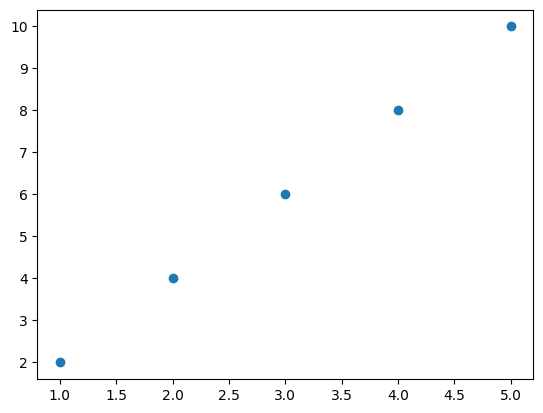

In [2]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = x_data * 2 - np.random.randint(0, 10) * 0.005
plt.scatter(x_data, y_data)

In [3]:
print(x_data.shape)
print(y_data.shape)

(5,)
(5,)


In [4]:
def forward(x,w,b=0):
  return  w * x + b

def loss(y_hat, y):
  return (y_hat - y) ** 2

In [5]:
all_w = []
all_loss = []

In [6]:
for w in np.arange(0, 4, 0.1): # 0,0.1,0.2,0.3...4
  l_sum = 0
  for i in range(len(x_data)):
    # print(f" x :{x_data[i]}, w:{ w}")
    y_hat = forward(x_data[i], w)
    l = loss(y_hat, y_data[i])
    l_sum += l
  all_w.append(w)
  all_loss.append(l_sum / len(y_data))

Text(0, 0.5, 'loss')

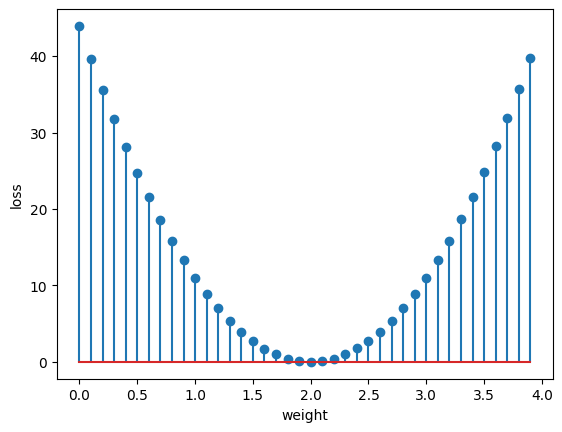

In [7]:
plt.stem(all_w, all_loss)
plt.xlabel("weight")
plt.ylabel("loss")

In [8]:
x_torch = torch.FloatTensor(x_data).reshape(-1, 1)
y_torch = torch.FloatTensor(y_data).reshape(-1, 1)

In [9]:
w = torch.tensor(5., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
lr = 0.05
epochs = 1000

In [10]:
for i in range(epochs):
  y_hat = x_torch * w + b
  squred_diff = torch.pow(y_torch - y_hat, 2)
  loss = torch.sum(squred_diff / len(y_torch))
  loss.backward()
  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()


In [11]:
y_pred = x_torch * w + b

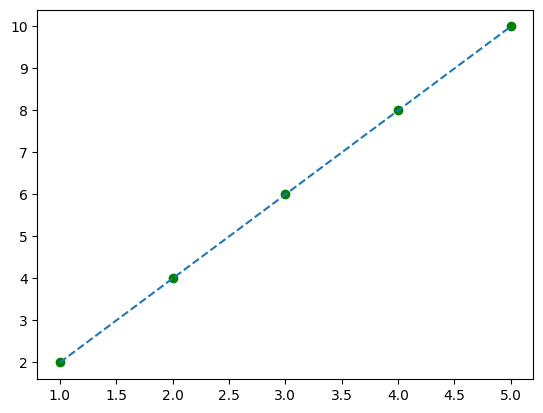

In [12]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--')

In [13]:
print(w, b)

tensor(2.0000, requires_grad=True) tensor(-0.0050, requires_grad=True)


In [14]:
x_test = torch.Tensor([3.5])
pred = x_test * w + b
print(pred)

tensor([6.9950], grad_fn=<AddBackward0>)